In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
import os

É possível filtrar e visualizar dinâmicamente os dados para essa US!

Para tal, altere o valor das duas variaveis logo abaixo, <i><b>anoDeConsulta</b><i> e <i><b>regiaoAConsultar</b><i>
  - <i><b>anoDeConsulta</b><i>: Os valores podem ser "2021" e "2020"
  - <i><b>regiaoAConsultar</b><i>: Os valores podem ser "Região 1", "Região 2", "Região 3" e "Região 5", cada um representa uma região do Vale do Paraíba e agregam seus respectivos municípios, na quarta célula deste <i>notebook<i> você pode consultar os municípios e as regiões a qual eles pertencem

Os resultados da consulta estarão ao final do <i>notebook<i> após a execução do mesmo
    
## Atenção!
A região 4 apresenta inconsistências em seus dados, por isso não é possível a visualização para essa região

In [2]:
anoDeConsulta = "2021"
regiaoAConsultar = "Região 5"

In [3]:
dicionarioMeses = {
    1: "Janeiro", 
    2: "Fevereiro", 
    3: "Março", 
    4: "Abril", 
    5: "Maio", 
    6: "Junho", 
    7: "Julho", 
    8: "Agosto",
    9: "Setembro", 
    10: "Outubro", 
    11: "Novembro", 
    12: "Dezembro"
}

def pegarNomeMes(numeroMes):
    return dicionarioMeses[numeroMes]

In [4]:
dicionarioDeDados = {
    "sexo": {
        1: "Homem",
        3: "Mulher",
        9: "Não identificado"
    },
    "tipomovimentação": {
        10: "Admissão", #"Admissão por primeiro emprego",
        20: "Admissão", #"Admissão por reemprego,"
        25: "Admissão", #"Admissão por contrato trabalho prazo determinado",
        31: "Demissão", #"Desligamento por demissão sem justa causa",
        32: "Demissão", #"Desligamento por demissão com justa causa",
        33: "Demissão", #"Culpa Recíproca",
        35: "Admissão", #"Admissão por reintegração",
        40: "Demissão", #"Desligamento a pedido",
        43: "Demissão", #"Término contrato trabalho prazo determinado",
        45: "Demissão", #"Desligamento por Término de contrato",
        50: "Demissão", #"Desligamento por aposentadoria",
        60: "Demissão", #"Desligamento por morte",
        70: "Admissão", #"Admissão por transferência",
        80: "Demissão", #"Desligamento por transferência",
        90: "Demissão", #"Desligamento por Acordo entre empregado e empregador",
        98: "Demissão", #"Desligamento de Tipo Ignorado",
        99: "Não Identificado"
    },
    "município": {
        "Região 1": {
            350850: "Caçapava",            # Grupo 1
            352020: "Igaratá",             # Grupo 1
            352440: "Jacareí",             # Grupo 1
            352490: "Jambeiro",            # Grupo 1
            353170: "Monteiro Lobato",     # Grupo 1
            353560: "Paraíbuna",           # Grupo 1
            354600: "Santa Branca",        # Grupo 1
            354990: "São José dos Campos", # Grupo 1
        },
        "Região 2": {
            350970: "Campos do Jordão",        # Grupo 2
            352630: "Lagoinha",                # Grupo 2
            353230: "Natividade da Serra",     # Grupo 2
            353800: "Pindamonhangaba",         # Grupo 2
            354230: "Redenção da Serra",       # Grupo 2
            354820: "Santo Antônio do Pinhal", # Grupo 2
            354860: "São Bento do Sapucaí",    # Grupo 2
            355000: "São Luiz do Paraitinga",  # Grupo 2
            355410: "Taubaté",                 # Grupo 2
            355480: "Tremembé",                # Grupo 2
        },
        "Região 3": {
            350250: "Aparecida",          # Grupo 3
            350860: "Cachoeira Paulista", # Grupo 3
            350995: "Canas",              # Grupo 3
            351360: "Cunha",              # Grupo 3
            351840: "Guaratinguetá",      # Grupo 3
            352720: "Lorena",             # Grupo 3
            353850: "Piquete",            # Grupo 3
            354075: "Potim",              # Grupo 3
            354430: "Roseira",            # Grupo 3
        },
        "Região 4": {
            350315: "Arapeí",               # Grupo 4
            350350: "Areias",               # Grupo 4
            350490: "Bananal",              # Grupo 4
            351340: "Cruzeiro",             # Grupo 4
            352660: "Lavrinhas",            # Grupo 4
            354190: "Queluz",               # Grupo 4
            354960: "São José do Barreiro", # Grupo 4
            355200: "Silveiras",            # Grupo 4
        },
        "Região 5": {
            351050: "Caraguatatuba", # Grupo 5
            352040: "Ilhabela",      # Grupo 5
            355070: "São Sebastião", # Grupo 5
            355540: "Ubatuba"        # Grupo 5
        }
    },
    "raçacor": {
        1: "Branca",
        2: "Preta",
        3: "Parda",
        4: "Amarela",
        5: "Indígena",
        6: "Não informada",
        9: "Não Identificado"
    }
}

In [5]:
def lerTabelasDiretorio(ano, colunasUtilizaveis):
    caminhoDados = "../doc/Dados/CAGED"
    
    fonteDados = os.listdir(caminhoDados + "/" + ano)
    
    # Retira os arquivos que não são do tipo .txt da lista
    for arquivo in fonteDados:
        if ".txt" not in arquivo:
            del fonteDados[fonteDados.index(arquivo)]
            
    tabelas = {}
    
    for nomeTabela in fonteDados:
        valorMes = int(nomeTabela.split(".")[0][-2:])  # Pega os dois últimos valores do nome do arquivo, que representam o mês e converte para um inteiro
        nomeMes = pegarNomeMes(valorMes)
        tabelas[nomeMes] = pandas.read_csv(caminhoDados + "/" + ano + "/" + nomeTabela,
                                           delimiter=";",
                                           usecols=colunasUtilizaveis)
        
    return tabelas

In [6]:
colunasUtilizaveis = ["sexo", "tipomovimentação", "município", "raçacor", "salário"]

dados2020 = lerTabelasDiretorio("2020", colunasUtilizaveis)
dados2021 = lerTabelasDiretorio("2021", colunasUtilizaveis)

In [7]:
def organizarPorRegiao(dadosCrus):
    novosDados = {}
    
    for mes in dadosCrus:
        for grupoRegiao in dicionarioDeDados["município"]:
            for codigoRegiao in dicionarioDeDados["município"][grupoRegiao]:
                nomeMunicipio = dicionarioDeDados["município"][grupoRegiao][codigoRegiao]
                
                mascara = dadosCrus[mes]["município"] == codigoRegiao
                
                filtrado = dadosCrus[mes][mascara]
                
                if grupoRegiao not in novosDados:
                    novosDados[grupoRegiao] = {
                        nomeMunicipio: {
                            mes: filtrado
                        }
                    }
                elif nomeMunicipio not in novosDados[grupoRegiao]:
                    novosDados[grupoRegiao][nomeMunicipio] = {
                        mes: filtrado
                    }
                else:
                    novosDados[grupoRegiao][nomeMunicipio][mes] = filtrado
        
    return novosDados

In [8]:
dadosPorRegiao2020 = organizarPorRegiao(dados2020)
dadosPorRegiao2021 = organizarPorRegiao(dados2021)

In [9]:
def pegarTipoColunaGrupo(grupo, nomeColuna):
    indexColuna = grupo.columns.get_loc(nomeColuna)
    return grupo.sample().values[0][indexColuna]

def filtrarPorEtnia(dados):
    novosDados = {}
    
    for regiao in dados:
        if regiao not in novosDados:
            novosDados[regiao] = {}
        
        for municipio in dados[regiao]:
            if municipio not in novosDados[regiao]:
                novosDados[regiao][municipio] = {}
                
            for mes in dados[regiao][municipio]:
                if mes not in novosDados[regiao][municipio]:
                    novosDados[regiao][municipio][mes] = {}
                    
                grupo = dados[regiao][municipio][mes].groupby(["raçacor"])
                
                for chave, valor in grupo:
                    subgrupo = grupo.get_group(chave)
                    
                    codigoEtnia = int(pegarTipoColunaGrupo(subgrupo, "raçacor"))
                    
                    etnia = dicionarioDeDados["raçacor"][codigoEtnia]
                    mediaSalarial = subgrupo["salário"].mean()

                    if "Média salarial" not in novosDados[regiao][municipio][mes]:
                        novosDados[regiao][municipio][mes]["Média salarial"] = {
                            etnia: mediaSalarial
                        }
                    else:
                        if "Não" not in etnia:  # Filtro para não adicionar informções não iddentificadas ou não informadas
                            novosDados[regiao][municipio][mes]["Média salarial"][etnia] = round(mediaSalarial, 2)  # Arredonda para 2 casas decimais

    return novosDados

In [10]:
mediaSalarialEtinia2020 = filtrarPorEtnia(dadosPorRegiao2020)
mediaSalarialEtinia2021 = filtrarPorEtnia(dadosPorRegiao2021)

In [11]:
def prepararDadosPizza(dadosRegiao):
    dadosPreparados = {}
    
    for municipio in dadosRegiao:
        for mes in dadosRegiao[municipio]:
            dadosPreparados[mes] = {
                "etnia": [],
                "media": []
            }
            
            for etnia in dadosRegiao[municipio][mes]["Média salarial"]:
                dadosPreparados[mes]["etnia"].append(etnia)

                salariosEtniaRegiaoMes = []

                for municipioMediaMes in dadosRegiao:
                    if etnia in dadosRegiao[municipioMediaMes][mes]["Média salarial"]:
                        salariosEtniaRegiaoMes.append(dadosRegiao[municipioMediaMes][mes]["Média salarial"][etnia])

                total = 0
                for salario in salariosEtniaRegiaoMes:
                    total += salario

                dadosPreparados[mes]["media"].append(round(total / len(salariosEtniaRegiaoMes), 2))
    
    return dadosPreparados

def plotarGraficoPizza(dadosPizzaRegiao, regiao, ano):
    for mes in dadosPizzaRegiao:
        etnias = dadosPizzaRegiao[mes]["etnia"]
        salarios = dadosPizzaRegiao[mes]["media"]
        
        plt.pie(salarios, labels=salarios, autopct='%1.1f%%', shadow=True, startangle=90)
        
        #Adiciona Legenda
        plt.legend(etnias, bbox_to_anchor=(1.3, 0.9),loc='upper right')

        #Centraliza o gráfico
        plt.axis('equal')
        
        municipios = dicionarioDeDados["município"][regiao]
        
        titulo = "Média salarial por etnia para o agrupamento de municípios\n"
        
        for municipio in municipios:
            titulo += municipios[municipio] + " "
        
        titulo += "\n" + mes + "/" + ano + "\n"
        
        plt.title(titulo)
        
        #Ajusta o espaçamento para evitar o recorte do rótulo
        plt.tight_layout()

        plt.show()

In [12]:
dadosPreparadosPizzaRegiao1_2020 = prepararDadosPizza(mediaSalarialEtinia2020["Região 1"])
dadosPreparadosPizzaRegiao2_2020 = prepararDadosPizza(mediaSalarialEtinia2020["Região 2"])
dadosPreparadosPizzaRegiao3_2020 = prepararDadosPizza(mediaSalarialEtinia2020["Região 3"])
dadosPreparadosPizzaRegiao5_2020 = prepararDadosPizza(mediaSalarialEtinia2020["Região 5"])

dadosPreparadosPizzaRegiao1_2021 = prepararDadosPizza(mediaSalarialEtinia2021["Região 1"])
dadosPreparadosPizzaRegiao2_2021 = prepararDadosPizza(mediaSalarialEtinia2021["Região 2"])
dadosPreparadosPizzaRegiao3_2021 = prepararDadosPizza(mediaSalarialEtinia2021["Região 3"])
dadosPreparadosPizzaRegiao5_2021 = prepararDadosPizza(mediaSalarialEtinia2021["Região 5"])

In [13]:
dadosPreparadosParaPlotar = {
    "2020": {
        "Região 1": dadosPreparadosPizzaRegiao1_2020,
        "Região 2": dadosPreparadosPizzaRegiao2_2020,
        "Região 3": dadosPreparadosPizzaRegiao3_2020,
        "Região 5": dadosPreparadosPizzaRegiao5_2020,
    },
    "2021": {
        "Região 1": dadosPreparadosPizzaRegiao1_2021,
        "Região 2": dadosPreparadosPizzaRegiao2_2021,
        "Região 3": dadosPreparadosPizzaRegiao3_2021,
        "Região 5": dadosPreparadosPizzaRegiao5_2021,
    }
}

dadosEscolhidosRegiao = dadosPreparadosParaPlotar[anoDeConsulta][regiaoAConsultar]

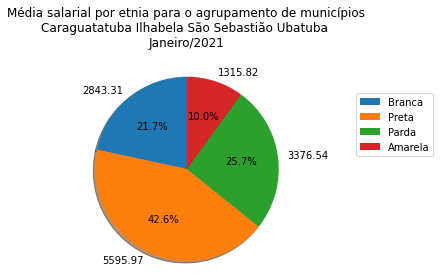

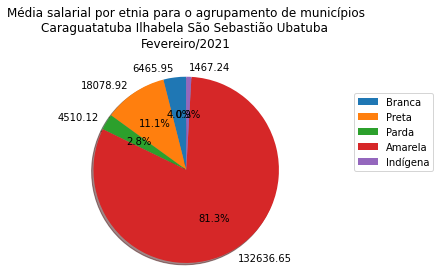

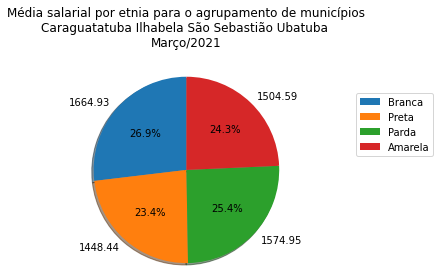

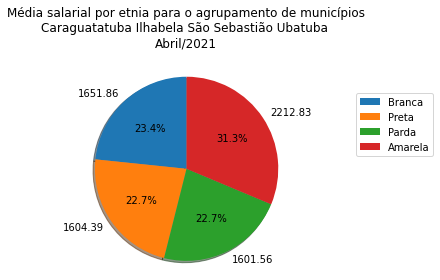

In [14]:
plotarGraficoPizza(dadosEscolhidosRegiao, regiaoAConsultar, anoDeConsulta)